In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Cesta světla - Fermatův princip a zákon lomu

Snellův zákon popisuje to jak se světlo láme na rozhraní dvou optických prostředí. Podle Snellova zákona je úhel dopadajícího svazku $\alpha_1$ a úhel lomeného svazku $\alpha_2$ provázán vztahem

\begin{equation*}
    n_1 \sin{\alpha_1} = n_2 \sin{\alpha_2}
\end{equation*}

kde $n_1$ a $n_2$ jsou indexy lomu původního a nového prostředí. Index lomu je dán rychlostí $v$ jakou se světlo šíří v daném optickém prostředí - $n = \frac{c}{v}$, kde $c = 299 792 458 \text{ m/s}$ je rychlost světla ve vakuu.

<img src="snell_law.jpg" width="800"/>

Ekvivalentní popis lomu světla na rozhraní dvou optických prostředí poskytuje tzv. Fermatův princip - *Světlo se šíří z jednoho bodu do druhého po takové dráze, aby byla doba potřebná k proběhnutí této dráhy byla co nejmenší*. V tomto cvičení si numericky ukažeme, že je Fermatův princip opravdu ekvivalentní Snellově zákonu.

Mějme světelný paprsek, který se šíří vzduchem s indexu lomu $n_1 \approx 1$. Paprsek doputuje až k rozhraní se sklem s idexem lomu $n_2 = 1.5$, pod úhlem $\alpha_1 = 30° \approx 0.524 \text{ rad}$. Pod jakým úhlem od normály k rozhraní se bude světelný paprsek šířit dál? Použijeme snellův zákon.

In [3]:
# Definujeme si funckci pro výpočet úhlu lomu

def snell_law(alpha_1, n_1, n_2):
    return( np.rad2deg(np.arcsin((n_1/n_2)*np.sin(np.deg2rad(alpha_1)))) )

In [4]:
# Definujeme si vstupní proměnné a vložíme je do funkce

alpha_1 = 30
n_1 = 1
n_2 = 1.5


print(f"Úhel lomu je a_2 = {snell_law(alpha_1, n_1, n_2):,.2f}°")

Úhel lomu je a_2 = 19.47°


Zkusme vypočítat úhel lomu pomocí Fermatova principu. Předpokládáme, že se paprsek šíří po přímce dokud nedorazí k optickému rozhraní jako na obrazku níže.

<img src="output-onlinepngtools.jpg" width="500"/>

Cesta paprsku tedy bude tvořena dvěma usečkami $AP$ a $PB$. Zafixujme body $A$ a $B$ a bod $P$ budeme posouvat po optickém rozhraní. Poté spočteme čas, který by světlo potřebovalo k tomu, aby se dostalo z bodu $A$ do bodu $B$ po této trajektorii. 

Doba, kterou bude světlo potřebovat, k tomu aby se dostalo z bodu $A$ do bodu $P$ (označme vzálenost mezi těmito body $l_1 = \sqrt{x^2+a^2}$), je 

\begin{equation*}
    t_1 = \frac{l_1}{v_1} = \frac{n_1 \sqrt{x^2+a^2}}{c}
\end{equation*}

a doba, kterou cestu potřebuje k uražení vzálenosti mezi $PB$ je

\begin{equation*}
    t_2 = \frac{l_2}{v_2} = \frac{n_2 \sqrt{(d-x)^2+b^2}}{c}.
\end{equation*}

Řekněme že $a = b = 1 \text{ m}$ a $d = 0.931 \text{ m}$ (rozměry jsou zvoleny tak, aby se ověřila správnost přechozího příkladu). Předpokládáme, že souřadnice bodu $P$ bude ležet někde v intervalu $x \in (0 \text{ m},2 \text{ m})$. Pojďme počítat!

In [5]:
#Definujeme si funkce pro spočtení vzdálenosti, kterou paprsek urazí a času, který k tomu bude potřebovat

def vzdalenost(x,y):
    return(np.sqrt(x**2+y**2))

c = 299792458

def cas(x,y,n):
    return((n*vzdalenost(x,y))/(c))

In [6]:
# Definujeme si proměnné

a = 1                           # [m]
b = 1                           # [m]
d = 0.9309036597828995          # [m] - specialní volba promenné abychom mohli overit snelluv zakon pro stejny uhel dopadu i lomu jako v prechozim vypoctu
x = np.linspace(0,d,100000)     # Vygenerujeme si sto tisíc pozic bodu P

In [7]:
# Spočteme čas, který bude potřeba pro překonání dráhy s různými polohami bodu P 

t = cas(x,a,n_1)+cas(d-x,b,n_2)

In [8]:
# Hledání minimálního času t_min a s ním spojené polohy bodu P x_min

x_min = x[0]
t_min = t[0]

for i in range(len(t)):
    if t[i] < t_min:
        t_min = t[i]
        x_min = x[i]

Teď když známe polohu bodu $P$, pro kterou je cesta světka co nejkratší, můžeme se podívat na úhly dopadu a lomu. Využijeme k tomu následuící dva vzorce

\begin{gather*}
    \alpha_1 = \arctg(\frac{x_{min}}{a}), \\
    \alpha_2 = \arctg(\frac{d-x_{min}}{b}).
\end{gather*}

In [9]:
# Definujeme si funkci pro výpočet úhlu

def uhel(a,b):          
    return(np.rad2deg(np.arctan(a/b)))

In [10]:
print(f"Pomocí Fermatova principu jsme vypočítali, že při úhlu dopadu {uhel(x_min,a):,.2f}° (na rozhraní vzduch-sklo) se světelný paprsek bude lámat pod úhlem {uhel(d-x_min,b):,.2f}° což souhlasí se Snellovým zákonem.")

Pomocí Fermatova principu jsme vypočítali, že při úhlu dopadu 30.00° (na rozhraní vzduch-sklo) se světelný paprsek bude lámat pod úhlem 19.47° což souhlasí se Snellovým zákonem.


Numericky jsme ověřili, že Fermatův princip je opravdu ekvivalentí Snellově zákonu. Zkusme si vykreslit pár různých drah a jejich časy.   

In [11]:
# Nachystáme si 5 různých poloh bodu P a časů, které jsou s těmito polohami spojené

x_help = np.linspace(0,d,5)
t_help = cas(x_help,a,n_1)+cas(d-x_help,b,n_2)

In [12]:
# Body A a B

A = [0,a]
B = [d,-b]

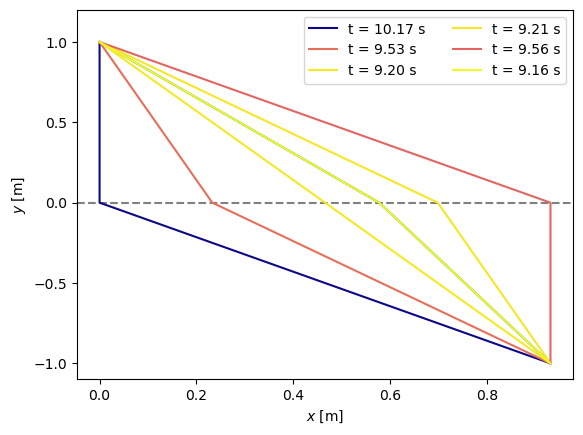

In [13]:
#Vykreslení různých světelných drah s časem, který by byl k překonaní této dráhy potřeba

plt.plot([A[0], x_min, B[0]], [A[1], 0, B[1]])

norm = mcolors.Normalize(vmin=t_min, vmax=np.max(t_help))       #Pomocná funkce pro přiřazení barvy k času dané dráhy
cmap = plt.colormaps["plasma_r"]

for i in range(len(x_help)):            #Vykreslení různých trajektorií
    plt.plot([A[0], x_help[i], B[0]], [A[1], 0, B[1]], color = cmap(norm(t_help[i])), zorder = 2, label = f"t = {t_help[i]*1e9:,.2f} s")

plt.plot([A[0], x_min, B[0]], [A[1], 0, B[1]], color = cmap(norm(t_min)), zorder = 2, label = f"t = {t_min*1e9:,.2f} s")        #Vykreslení nejrychlejší trajektorie

plt.axhline(0, color = "gray", zorder = 1, linestyle = "--")

plt.ylabel("$y$ [m]")
plt.xlabel("$x$ [m]")

plt.ylim(-1.1, 1.2)
plt.legend(ncol=2)

Jak vidíme, tak z našich pár trajektorií je operavdu nejrychlejší ta, která souhlasí se Snellovým zákonem.

Pojdmě si to ověřit ještě na více drahách.

(-1.1, 1.2)

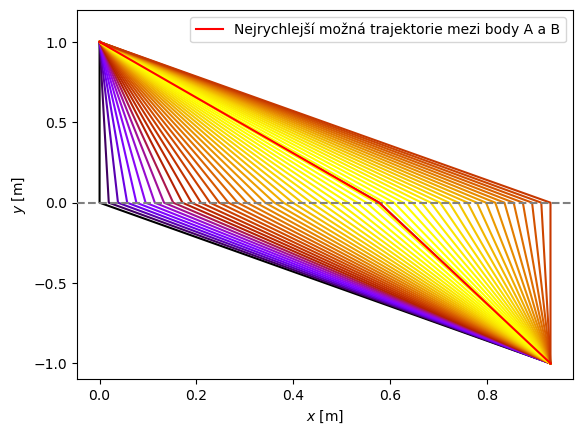

In [15]:
x_help = np.linspace(0,d,50)
t_help = cas(x_help,a,n_1)+cas(d-x_help,b,n_2)

plt.plot([A[0], x_min, B[0]], [A[1], 0, B[1]])

norm = mcolors.Normalize(vmin=t_min, vmax=np.max(t_help))
cmap = plt.colormaps["gnuplot_r"]


plt.plot([A[0], x_min, B[0]], [A[1], 0, B[1]], color = "red", zorder = 5, label = f"Nejrychlejší možná trajektorie mezi body A a B")

for i in range(len(x_help)):
    plt.plot([A[0], x_help[i], B[0]], [A[1], 0, B[1]], color = cmap(norm(t_help[i])), zorder = 2)

plt.axhline(0, color = "gray", zorder = 4, linestyle = "--")

plt.ylabel("$y$ [m]")
plt.xlabel("$x$ [m]")

plt.legend()

plt.ylim(-1.1, 1.2)